# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [68]:
print("size: ",len(df['temperature']))

size:  130


### 1.  Is the distribution of body temperatures normal? ###

**Graphical Ways to test normality**

The mean and median of a normal distribution are equal. The density plot of the distribution is symmetric around the mean/median. The quantile-quantile plot of a normal distribution fits on a straight line.

In [25]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

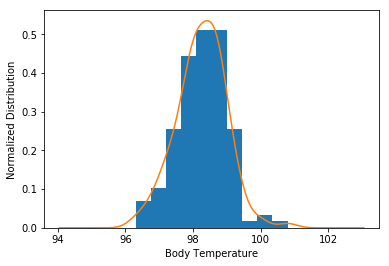

In [74]:
# the density plot and the histogram of the distribution of the body temperature
df.temperature.hist(normed=True)
df.temperature.plot(kind = 'kde')
plt.xlabel('Body Temperature')
plt.ylabel('Normalized Distribution')
plt.show()

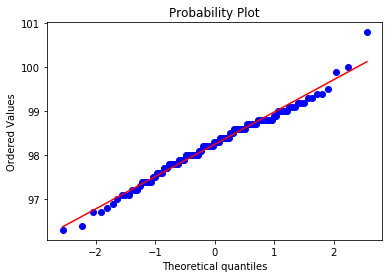

In [56]:
# Qunatile-quantile plot of distribution of the body temperatures
stats.probplot(df['temperature'],plot=plt)
plt.show()

In [57]:
print('Mean of the distribution is: ',np.mean(df['temperature']),' and the Median is ',np.median(df['temperature']))

Mean of the distribution is:  98.2492307692  and the Median is  98.3


**Observation:**

1. The density plot of the distribution of temperature is about symmetrical around 98.3
2. The quantile-quantile plot of the distribution almost linear
3. The mean and the median of the distributions are equal


### Statistical Tests of Normality ###

***I. Shapiro Wilk Test***

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data distribution is normal. This method was created by Samuel Shapiro and Martin Wilk.

In [58]:
stat, p = stats.shapiro(df['temperature'])
if(p > 0.05):
    print('Distribution of the body temperature is Normal')
else:
    print('Distribution of the body temperature is not Normal')        

Distribution of the body temperature is Normal


***II. D’Agostino’s K-squared Test***

The D’Agostino’s K-squared test calculates the kurtosis and skewness to determine if the data distribution departs from the normal distribution. This test was developed by Ralph D’Agostino.

In [65]:
skew, kurt = stats.normaltest(df['temperature'])
if(kurt > 0.005):
    print('Distribution of the body temperature is Normal')
else:
    print('Distribution of the body temperature is not Normal') 

Distribution of the body temperature is Normal


### 2. Is the sample size large? Are the observations independent? 




In [71]:
# Check if the sample size, n is greater than 30
if len(df) > 30:
    print('Sample size is:', len(df),'(i.e. n>30); it is large enough for Central Limit Theorem')
else: 
    print('Sample size is not large enough for Central Limit Theorem')

Sample size is: 130 (i.e. n>30); it is large enough for Central Limit Theorem


*The observations are independent because the body temperature of each individual is independent of others.*